<a href="https://colab.research.google.com/github/diaruizja/Reto_Analisis_de_mercado_inmobiliario/blob/master/Reto_An%C3%A1lisis_de_mercado_inmobiliario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba técnica: Análisis de mercado inmobiliario

El objetivo es reproducir los pasos qude un Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

# 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**Respuesta**: para este problema es importante entender que el objetivo a analizar es la prediccion del precio de un nuevo inmueble. Para lo cual es importante tener en cuenta que la variable target (objetivo) a predecir sera el campo de "price", por tanto, los datos que mas me ayudarian a trabajar en este problema o a predecir el campo "price" serian las variables predictoras que hacen referencia a "surface_total" y "price_per_m2"(esta ultima variable no se encuentra dentro del dataset, la cual se debe calcular a partir de los datos que se tienen) como principales variables. Ya que estas son por lo general las caracteristicas principales que se toman en cuenta para inicialmente valorar el precio de un inmueble.

El resto de las categorias presentes en el dataset serviran para refinar el modelo de Machine Learning, el cual a partir de estos datos aprendera mas facil y se equipara mejor para la prediccion de precios a partir de datos nuevos.

# 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Nos interesa que predigas el precio de una nueva propiedad de la ciudad


Para iniciar con la solucion de este trabajo, es importante mencionar que todo el flujo de trabajo estara basado en la metodología CRISP-DM, la cual consta de los siguientes pasos:

1.   Entendimiento del problema
2.   Exploración de los datos
3.   Transformación y selección de caracteristicas
4.   Modelado (Machine Learning) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Antes de iniciar con el flujo de trabajo es necesario importar las principales librerias para la correcta exploración del Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Se carga la data para iniciar con el análisis**


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DS_Proyecto_01_Datos_Properati_2.csv")
df.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [ ]:
df.shape

(146660, 19)

***Se eliminan algunas columnas que de entrada no nos aportan para el modelo ***

In [ ]:
df=df.drop(columns=["start_date", "end_date","created_on"])
df.head(3)

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


**Se realiza una exploracion de la data y sus principales caracteristicas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              136735 non-null  float64
 1   lon              136701 non-null  float64
 2   l1               146660 non-null  object 
 3   l2               146660 non-null  object 
 4   l3               146660 non-null  object 
 5   rooms            146660 non-null  float64
 6   bedrooms         146660 non-null  float64
 7   bathrooms        140703 non-null  float64
 8   surface_total    126133 non-null  float64
 9   surface_covered  125046 non-null  float64
 10  price            146660 non-null  float64
 11  currency         146660 non-null  object 
 12  title            146660 non-null  object 
 13  description      146660 non-null  object 
 14  property_type    146660 non-null  object 
 15  operation_type   146660 non-null  object 
dtypes: float64(8), object(8)
memory usage:

**Se crea una matriz de correlacion para ver como se comportan las diferentes variables predictoras entre si y tomar desiciones de dropeo inicial**

In [ ]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.007618,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.016905,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.869769,0.613308,0.081044,0.075012,0.351025
bedrooms,0.007618,-0.016905,0.869769,1.000000,0.588527,0.079229,0.072627,0.316192
bathrooms,0.019923,-0.028612,0.613308,0.588527,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.079229,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.072627,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.316192,0.556861,0.038727,0.049136,1.000000


In [ ]:
#En esta celda se eliminan algunas columnas que no son de mucho interes para alimentar el modelo
df = df.drop(columns = ['title','description', "bedrooms", 'l1',"l2",'currency',"operation_type"], axis = 1)
df.head(5)

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,San Cristobal,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Boedo,2.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Palermo,2.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Palermo,2.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,La Plata,2.0,1.0,50.0,35.0,40000.0,PH


In [ ]:
#se realiza una nueva correlacion de pearson para evaluar la informacion contenida en la data
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.613308,0.081044,0.075012,0.351025
bathrooms,0.019923,-0.028612,0.613308,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.556861,0.038727,0.049136,1.000000


In [ ]:
# se muestran las categorías del campo property_type y su cantidad de valores
df["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Teniendo en cuanta la anterior celda y considerando que lo mas representativo dentro del dataset son las categorias de "Departamento", "Casa" y "PH", se procede a realizar un filtrado de la data por estas categorias con el fin de mostrarle al modelo datos mas representativos que lo ayudaran a tener mas exactitud en las predicciones, ademas de considerar que son propiedades que estan en la ciudad.

In [ ]:
lista_propiedades = ['Departamento','Casa','PH']
df_filtrado=df[df['property_type'].isin(lista_propiedades)]

In [ ]:
df_filtrado.head(3)

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,San Cristobal,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Boedo,2.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Palermo,2.0,1.0,45.0,45.0,125000.0,PH


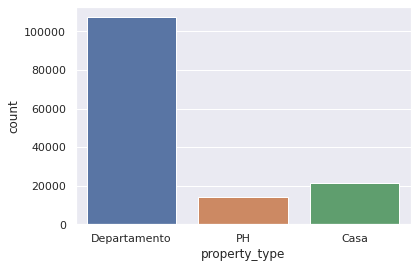

In [ ]:
#en esta celda se realiza una visualizacion grafica de las categorias escogidas para entenderlo de una mejor manera 
sns.countplot(x="property_type", data=df_filtrado)

***Analisis de valores faltantes o Nulos ***

In [ ]:
# En esta celda se determinan que columnas poseen valores faltantes y cuanto es su cantidad
df_filtrado.isna().sum()

lat                 9593
lon                 9624
l3                     0
rooms                  0
bathrooms           4211
surface_total      18623
surface_covered    18909
price                  0
property_type          0
dtype: int64

En las siguientes celdas se desea analizar si existen errores en el dataset, principalmente en las columnas de interes predictor como son "surface_total" y "surface_covered". para esto se hace un analisis comparativo entre las dos columnas antes mencionadas. 

el error que se busca es si "surface_total" < "surface_covered", cosa que no puede ser cierta ya que deberia ser al contrario "surface_total" > "surface_covered"

In [ ]:
# en esta celda se muestra cuantos errores pueden haber en las distintas superficies
incorrectos = df_filtrado[df_filtrado["surface_total"] < df_filtrado["surface_covered"]]
print("Total de instancias con errores en la superficie:", incorrectos.shape[0])

Total de instancias con errores en la superficie: 1420


En total son 1420 instancias que tienen el dato errado, se propone intercambiar los valores de **superficie total** con **superficie cubierta**

In [ ]:
df_filtrado.at[incorrectos.index, 'surface_total'] = incorrectos.surface_covered
df_filtrado.at[incorrectos.index, 'surface_covered'] = incorrectos.surface_total

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Otro error que se desea buscar es el de las ubicaciones de las propiedades, ya que muchas veces este dato puede estar repetido o distorcionado y por ende puede influir en el precio de un inmueble a la hora de valorizarse por el sector.

In [ ]:
puntos_repetidos = df_filtrado.groupby(['lat', 'lon']).size()
puntos_repetidos[puntos_repetidos > 1].sort_values(ascending=False).head(15)

lat         lon       
-34.425087  -58.579659    516
-34.597256  -58.445498    254
-34.578066  -58.426532    236
-34.579326  -58.455819    217
-34.596762  -58.421589    205
-34.587383  -58.397276    190
-34.589767  -58.420728    168
-34.542750  -58.460145    168
-34.618150  -58.394095    160
-34.602133  -58.466831    156
-34.601364  -58.430143    153
-34.605265  -58.424579    151
-34.588007  -58.420122    139
-34.597679  -58.443019    132
-34.615924  -58.440603    130
dtype: int64

con la anterior celda nos damos cuenta que si existen muchos errores con la repeticion de los puntos para las ubicaciones de los inmuebles, por ende se procede hacer un filtrado de las propiedades cuya coordenada se repite maximo hasta 5 veces.

In [ ]:
puntos_repetidos.name = 'conteo' 

df_filtrado = df_filtrado.join(puntos_repetidos, on=['lat', 'lon'])

df_filtrado = df_filtrado[df_filtrado.conteo <= 5]

In [ ]:
df_filtrado.drop('conteo', inplace=True, axis=1)
df_filtrado.head(3)

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,San Cristobal,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Boedo,2.0,2.0,70.0,58.0,159000.0,PH
3,-34.581294,-58.436754,Palermo,2.0,1.0,85.0,50.0,295000.0,PH


In [ ]:
puntos_repetidos2 = df_filtrado.groupby(['lat', 'lon']).size()
puntos_repetidos2[puntos_repetidos2 > 1].sort_values(ascending=False).head(5)

lat         lon       
-34.555100  -58.450892    5
-34.553692  -58.688092    5
-34.587547  -58.511305    5
-34.587460  -58.386744    5
-34.553468  -58.473731    5
dtype: int64

In [ ]:
print("El dataset ahora posee {} registros".format(df_filtrado.shape[0]))

El dataset ahora posee 86294 registros


In [ ]:
#se realiza de nuevo un conteo de los valores faltantes que tiene el dataset hasta el momento
df_filtrado.isna().sum()

lat                    0
lon                    0
l3                     0
rooms                  0
bathrooms           2668
surface_total      11421
surface_covered    11667
price                  0
property_type          0
dtype: int64

**A continuacion se procede a realizar el procesamiento de filtrado de Outliers(valores atipicos) y la imputacion para valores Nulos que puede tener el dataset** 

**Cabe resaltar que se escoge de esta manera el orden de procesamiento ya que los datos pueden ser sensibles a variaciones en sus estadisticos si primero se imputan los valores nulos y luego se filtran los valores atipicos.**

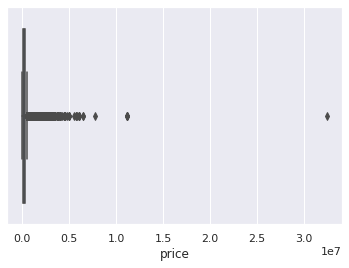

In [ ]:
#se realiza un grafico de boxplot para visualizar la distribucion de los valores atipicos en el precio de los inmuebles 
sns.boxplot(x="price", data=df_filtrado)

**A continuacion se procede a limpiar el precio aplicando la tecnica del rango intercuartilico (IQR) para el filtrado de outliers(valores atipicos)**

In [ ]:
#se hace una descripcion de los principales estadisticos para la columna de precio
df_filtrado["price"].describe()

count    8.629400e+04
mean     2.292501e+05
std      2.879827e+05
min      6.000000e+03
25%      1.085000e+05
50%      1.600000e+05
75%      2.600000e+05
max      3.243423e+07
Name: price, dtype: float64

In [ ]:
#regla del rango intercuartilico (IQR)
IQR=df_filtrado["price"].quantile(0.75) - df_filtrado["price"].quantile(0.25)
IQR

151500.0

In [ ]:
minimo= 1.085000e+05 -(IQR*1.5)
maximo= 2.600000e+05 +(IQR*1.5)
print(minimo,"\n",maximo)

-118750.0 
 487250.0


In [ ]:
#En esta celda se realiza el filtro
df_filtrado = df_filtrado[(df_filtrado.price > minimo) & (df_filtrado.price < maximo)]
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79874 entries, 0 to 146658
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              79874 non-null  float64
 1   lon              79874 non-null  float64
 2   l3               79874 non-null  object 
 3   rooms            79874 non-null  float64
 4   bathrooms        77345 non-null  float64
 5   surface_total    69180 non-null  float64
 6   surface_covered  68955 non-null  float64
 7   price            79874 non-null  float64
 8   property_type    79874 non-null  object 
dtypes: float64(7), object(2)
memory usage: 6.1+ MB


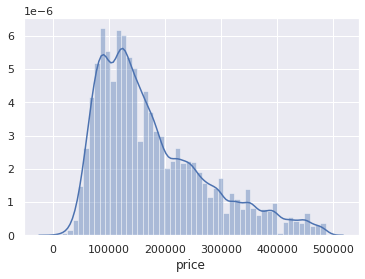

In [ ]:
#Esta celda muestra una distribucion de frecuencia de los precios despues del filtro de outliers
sns.distplot(df_filtrado["price"], hist=True, kde=True)

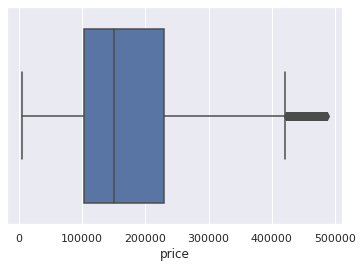

In [ ]:
#Esta celda muestra un boxplot de los precios despues del filtro de outliers
sns.boxplot(x="price", data=df_filtrado)

***A continuacion se procede a realizar la imputacion o llenado de los valores nulos que presenta el dataframe ***

In [ ]:
# esta celda muestra el porcentaje de valores faltantes dentro del dataset
porcentaje_nulos = df_filtrado.isna().mean().sort_values(ascending=False)*100
print(porcentaje_nulos)

surface_covered    13.670281
surface_total      13.388587
bathrooms           3.166237
property_type       0.000000
price               0.000000
rooms               0.000000
l3                  0.000000
lon                 0.000000
lat                 0.000000
dtype: float64


***considerando lo anterior, se procede a realizar la imputacion de las columnas con valores fatantes ***

Para el caso de la superficie cubierta y total se llenan los valores nulos con la media de la columna y para el caso de los baños esta llena con la mediana de la columna 

In [ ]:
#en esta celda se hace la imputacion de los valores faltantes utilizando la tecnica del SimpleImputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean', missing_values=np.nan)
df_filtrado[['surface_total','surface_covered']] = imp.fit_transform(df_filtrado[['surface_total','surface_covered']])
df_filtrado.isna().sum()

lat                   0
lon                   0
l3                    0
rooms                 0
bathrooms          2529
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64

In [ ]:
#en esta celda se hace la imputacion de los valores faltantes utilizando la tecnica del SimpleImputer
imp = SimpleImputer(strategy='median', missing_values=np.nan)
df_filtrado["bathrooms"]=imp.fit_transform(df_filtrado[["bathrooms"]])
df_filtrado.isna().sum()

lat                0
lon                0
l3                 0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

**Como se mencionó anteriormente, existe la necesidad de calcular una nueva variable que corresponde al precio por metro cuadrado de cada inmueble, esto con el fin de entregarle al modelo predictor variables que seran de utilidad para las futuras predicciones.**

In [ ]:
#en esta celda se calcula el precio por metro cuadrado para cada inmueble seleccionado
def division(x, y):
    if y > 0:
        resultado = x / y
    else:
      resultado = 0

    return resultado

df_filtrado['price_per_m2'] = df_filtrado.apply(lambda x: division(x['price'], x['surface_total']), axis = 1)
df_filtrado.head(3)

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type,price_per_m2
0,-34.605880,-58.384949,San Cristobal,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.857143
1,-34.624056,-58.412110,Boedo,2.0,2.0,70.0,58.0,159000.0,PH,2271.428571
3,-34.581294,-58.436754,Palermo,2.0,1.0,85.0,50.0,295000.0,PH,3470.588235


In [ ]:
#se realiza de nuevo un conteo de los valores faltantes que tiene el dataset hasta el momento
df_filtrado.isna().sum()

lat                0
lon                0
l3                 0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
price_per_m2       0
dtype: int64

***Transformacion de los datos ***

***A continuacion se procede a realizar una trasnformacion de las categorias del campo "property_type" y "l3" a variables numericas, utilizando la tecnica de OneHotEncoder ***

In [ ]:
#Transformacion para el campo "property_type"
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe.fit(df_filtrado[["property_type"]])
ohe.categories_

[array(['Casa', 'Departamento', 'PH'], dtype=object)]

In [ ]:
categorias=ohe.fit_transform(df_filtrado[["property_type"]])
categorias=pd.DataFrame(categorias)

In [ ]:
categorias.columns = ['Casa', 'Departamento', 'PH']
categorias.head(3)

,Casa,Departamento,PH
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0


In [ ]:
#Se anexan las nuevas categorias al dataframe
categorias = categorias.set_index(df_filtrado.index)
df_filtrado = pd.concat([df_filtrado, categorias], axis=1)
df_filtrado.head(3)

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type,price_per_m2,Casa,Departamento,PH
0,-34.605880,-58.384949,San Cristobal,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.857143,0.0,1.0,0.0
1,-34.624056,-58.412110,Boedo,2.0,2.0,70.0,58.0,159000.0,PH,2271.428571,0.0,0.0,1.0
3,-34.581294,-58.436754,Palermo,2.0,1.0,85.0,50.0,295000.0,PH,3470.588235,0.0,0.0,1.0


In [ ]:
#Transformacion para el campo "l3"
ohe.fit(df_filtrado[["l3"]])
ohe.categories_

[array(['Abasto', 'Agronomía', 'Almagro', 'Almirante Brown', 'Avellaneda',
        'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Berazategui',
        'Boca', 'Boedo', 'Caballito', 'Catalinas', 'Cañuelas',
        'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
        'Congreso', 'Constitución', 'Escobar', 'Esteban Echeverría',
        'Ezeiza', 'Florencio Varela', 'Flores', 'Floresta',
        'General Rodríguez', 'General San Martín', 'Hurlingham',
        'Ituzaingó', 'José C Paz', 'La Matanza', 'La Plata', 'Lanús',
        'Las Cañitas', 'Liniers', 'Lomas de Zamora', 'Malvinas Argentinas',
        'Marcos Paz', 'Mataderos', 'Merlo', 'Monserrat', 'Monte Castro',
        'Moreno', 'Morón', 'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
        'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
        'Parque Patricios', 'Paternal', 'Pilar', 'Pompeya',
        'Presidente Perón', 'Puerto Madero', 'Quilmes', 'Recoleta',
        'Retiro', 'Saavedra', 'San 

In [ ]:
categorias2=ohe.fit_transform(df_filtrado[["l3"]])
categorias2=pd.DataFrame(categorias2)
categorias2.columns = ['Abasto', 'Agronomía', 'Almagro', 'Almirante Brown', 'Avellaneda',
        'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Berazategui',
        'Boca', 'Boedo', 'Caballito', 'Catalinas', 'Cañuelas',
        'Centro / Microcentro', 'Chacarita', 'Coghlan', 'Colegiales',
        'Congreso', 'Constitución', 'Escobar', 'Esteban Echeverría',
        'Ezeiza', 'Florencio Varela', 'Flores', 'Floresta',
        'General Rodríguez', 'General San Martín', 'Hurlingham',
        'Ituzaingó', 'José C Paz', 'La Matanza', 'La Plata', 'Lanús',
        'Las Cañitas', 'Liniers', 'Lomas de Zamora', 'Malvinas Argentinas',
        'Marcos Paz', 'Mataderos', 'Merlo', 'Monserrat', 'Monte Castro',
        'Moreno', 'Morón', 'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
        'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
        'Parque Patricios', 'Paternal', 'Pilar', 'Pompeya',
        'Presidente Perón', 'Puerto Madero', 'Quilmes', 'Recoleta',
        'Retiro', 'Saavedra', 'San Cristobal', 'San Fernando',
        'San Isidro', 'San Miguel', 'San Nicolás', 'San Telmo',
        'San Vicente', 'Tigre', 'Tres de Febrero', 'Tribunales',
        'Velez Sarsfield', 'Versalles', 'Vicente López', 'Villa Crespo',
        'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
        'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real',
        'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
        'Villa Urquiza', 'Villa del Parque']

In [ ]:
#Se anexan las nuevas categorias al dataframe
categorias2 = categorias2.set_index(df_filtrado.index)
df_filtrado = pd.concat([df_filtrado, categorias2], axis=1)
df_filtrado.head(3)

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type,price_per_m2,Casa,Departamento,PH,Abasto,Agronomía,Almagro,Almirante Brown,Avellaneda,Balvanera,Barracas,Barrio Norte,Belgrano,Berazategui,Boca,Boedo,Caballito,Catalinas,Cañuelas,Centro / Microcentro,Chacarita,Coghlan,Colegiales,Congreso,Constitución,Escobar,Esteban Echeverría,Ezeiza,Florencio Varela,Flores,Floresta,...,Parque Avellaneda,Parque Centenario,Parque Chacabuco,Parque Chas,Parque Patricios,Paternal,Pilar,Pompeya,Presidente Perón,Puerto Madero,Quilmes,Recoleta,Retiro,Saavedra,San Cristobal,San Fernando,San Isidro,San Miguel,San Nicolás,San Telmo,San Vicente,Tigre,Tres de Febrero,Tribunales,Velez Sarsfield,Versalles,Vicente López,Villa Crespo,Villa Devoto,Villa General Mitre,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-34.605880,-58.384949,San Cristobal,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.857143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-34.624056,-58.412110,Boedo,2.0,2.0,70.0,58.0,159000.0,PH,2271.428571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-34.581294,-58.436754,Palermo,2.0,1.0,85.0,50.0,295000.0,PH,3470.588235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#se eliminan las categorias que ya son redundantes debido a la transformacion
df_filtrado=df_filtrado.drop(columns=["property_type", "l3"])
df_filtrado.head(3)

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,price_per_m2,Casa,Departamento,PH,Abasto,Agronomía,Almagro,Almirante Brown,Avellaneda,Balvanera,Barracas,Barrio Norte,Belgrano,Berazategui,Boca,Boedo,Caballito,Catalinas,Cañuelas,Centro / Microcentro,Chacarita,Coghlan,Colegiales,Congreso,Constitución,Escobar,Esteban Echeverría,Ezeiza,Florencio Varela,Flores,Floresta,General Rodríguez,General San Martín,...,Parque Avellaneda,Parque Centenario,Parque Chacabuco,Parque Chas,Parque Patricios,Paternal,Pilar,Pompeya,Presidente Perón,Puerto Madero,Quilmes,Recoleta,Retiro,Saavedra,San Cristobal,San Fernando,San Isidro,San Miguel,San Nicolás,San Telmo,San Vicente,Tigre,Tres de Febrero,Tribunales,Velez Sarsfield,Versalles,Vicente López,Villa Crespo,Villa Devoto,Villa General Mitre,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-34.605880,-58.384949,7.0,2.0,140.0,140.0,153000.0,1092.857143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-34.624056,-58.412110,2.0,2.0,70.0,58.0,159000.0,2271.428571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-34.581294,-58.436754,2.0,1.0,85.0,50.0,295000.0,3470.588235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**A continuacion se separa el dataset en conjuntos de entrenamiento y testeo**

In [ ]:
X = df_filtrado.drop(['price'], axis=1)
y = df_filtrado['price']

In [ ]:
#se utiliza una separacion 80% para entrenamiento del modelo y 20% para la validacion del mismo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, "\n", y_train.shape, "\n", X_test.shape, "\n", y_test.shape)

(63899, 99) 
 (63899,) 
 (15975, 99) 
 (15975,)


**Entrenamiento de los modelos y selecion de los mejores hiperparametros**

**Para esta seccion y entendiendo que se trata de un problema de regresion para la prediccion de los precios de los inmuebles; es necesario basar la exactitud del comportamiento de los modelos utilizando 2 metricas que son importantes para este tipo de problema, las cuales son RMSE(root mean square error) y r2-score (coeficiente de determinacion).**

**1) Modelo de Regresion lineal**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
linear=LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train=linear.predict(X_train)
y_pred_test=linear.predict(X_test)

In [ ]:
#en esta celda se hace una evaluacion de las metricas para analizar el desempeño del modelo
print(mean_squared_error(y_pred_test, y_test))
print("El RMSE en Test es : ", np.sqrt(mean_squared_error(y_pred_test, y_test)))
print("El r2-score en Test es : ", r2_score(y_pred_test, y_test))

3691666681.1861973
El RMSE en Test es :  60759.08723134505
El r2-score en Test es :  0.3644376863714035


**2) Modelo Árboles de decisión**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
param_grid = [{"min_samples_split": [2, 10, 20], "max_depth": [None, 2, 5, 10, 15], "min_samples_leaf": [1, 5, 10, 15], "max_leaf_nodes": [None, 5, 10, 20]}]

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
gs = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 5, 10, 15],
                          'max_leaf_nodes': [None, 5, 10, 20],
                          'min_samples_leaf': [1, 5, 10, 15],
                  

In [ ]:
print("Los mejores hiperparametros son:", gs.best_params_)

Los mejores hiperparametros son: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
optimised_decision_tree = gs.best_estimator_

In [ ]:
y_opt_pred = optimised_decision_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_pred))
print("El RMSE en Test es : ", np.round(rmse))

El RMSE en Test es :  7769.0


In [ ]:
print("El r2-score en Test es : ", r2_score(y_opt_pred, y_test))

El r2-score en Test es :  0.993708807098916


**A continuacion se realiza una comparativa de los valores reales para el precio de los inmuebles, con los predichos por el modelo**

In [ ]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_opt_pred)

In [ ]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] , axis=1)

In [ ]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,170000.0,170000.0,0.0
1,165000.0,165000.0,0.0
2,110000.0,105000.0,5000.0
3,212000.0,209000.0,3000.0
4,179000.0,179000.0,0.0
5,220000.0,220000.0,0.0
6,349000.0,340000.0,9000.0
7,430000.0,430000.0,0.0
8,203900.0,203900.0,0.0
9,190000.0,205000.0,15000.0


**3) Modelo de KNN (k-vecinos mas cercanos)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
k = np.arange(5, 30)
param_grid = {"n_neighbors" : k}

In [ ]:
gs2 = GridSearchCV(knn, param_grid, n_jobs = -1, scoring='neg_mean_squared_error', return_train_score = True, cv = 5, refit = True)
gs2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("Los mejores hiperparametros son:", gs2.best_params_)

Los mejores hiperparametros son: {'n_neighbors': 5}


In [ ]:
optimised_knn = gs2.best_estimator_

In [ ]:
y_opt_pred2 = optimised_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_pred2))
print("El RMSE en Test es : ", np.round(rmse))

El RMSE en Test es :  10839.0


In [ ]:
print("El r2-score en Test es : ", r2_score(y_opt_pred2, y_test))

El r2-score en Test es :  0.9874263632452728


**A continuacion se realiza una comparativa de los valores reales para el precio de los inmuebles, con los predichos por el modelo**

In [ ]:
val_real = pd.Series(y_test.values)
val_pred_knn = pd.Series(y_opt_pred2)

In [ ]:
predicciones2 = pd.concat([val_real.rename('Valor real'),val_pred_knn.rename('Valor Pred') ,abs(val_real-val_pred_knn).rename('Dif(+/-)')] , axis=1)

In [ ]:
predicciones2.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,170000.0,173000.0,3000.0
1,165000.0,158600.0,6400.0
2,110000.0,109800.0,200.0
3,212000.0,213998.0,1998.0
4,179000.0,179000.0,0.0
5,220000.0,216200.0,3800.0
6,349000.0,326092.2,22907.8
7,430000.0,425000.0,5000.0
8,203900.0,204340.0,440.0
9,190000.0,188860.0,1140.0


In [ ]:
#esta celda se utiliza para exportar el dataset procesado
df.to_csv("/content/drive/My Drive/Colab Notebooks/Dataset_final.csv", header=True, index=False)

**Finalmente y considerando lo anterior, se concluye que los modelos con mejor desempeño fueron el KNN y el Árbol de decisión, siendo este ultimo el que mejor desempeño tuvo en las prediciones del precio para un inmueble en particular. Otorgando un mejor resultado en las metricas de evaluacion con un RMSE cercano al valor real y un r2_score de 0.99 o del 99% en la precisión.**

# 3. Desafio
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

**Solución al desafío**

**Para este desafio se propone la siguiente pregunta, la cual se pretende responder con la informacion contenida en el dataset.**

**Pregunta: ¿Cual es el tipo de inmueble mas caro en la ciudad?**

In [ ]:
#en esta celda se visualiza el dataset para responder la pregunta 
df=df_filtrado.copy()
df.head(3)

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type,price_per_m2
0,-34.605880,-58.384949,San Cristobal,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.857143
1,-34.624056,-58.412110,Boedo,2.0,2.0,70.0,58.0,159000.0,PH,2271.428571
3,-34.581294,-58.436754,Palermo,2.0,1.0,85.0,50.0,295000.0,PH,3470.588235


In [ ]:
#en esta celda se realiza un conteo de la categoria de interes
df.property_type.value_counts()

Departamento    53351
Casa            16707
PH               9816
Name: property_type, dtype: int64

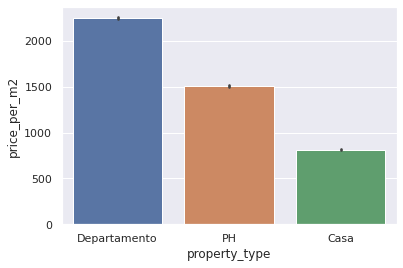

In [ ]:
#en esta celda se representa graficamente la distribucion los inmuebles segun su precio por m2
tipo_inmueble = df.groupby('property_type').mean().sort_values('price_per_m2', ascending=False).index
plt.xticks
sns.barplot(x="property_type", y="price_per_m2", order=tipo_inmueble, data=df);

**Segun lo anterior nos podemos dar cuenta que el tipo de inmueble mas caro en la ciudad corresponden a "Departamento". Esta respuesta seguro se encuentra sesgada debido al desbalanceo de los datos en el campo "property_type", los cuales estan mas inclinados hacia la cantidad de Departamentos**

**Para poder solucionar este sesgo se requiere de mas informacion correspondiente a las categorias de "PH" y "Casa", con el fin de balancear mas las etiquetas seleccionadas. Dicha informacion se podria obtener de portales en internet haciendo "Scraping" o consultando bases de datos de otras inmobiliarias o pagando por la informacion**

**Otra forma de balancear los datos seria aplicar tecnicas de balanceo como "SMOTE", "Resample" o eliminar cierta cantidad de registros pertenecientes a la clase predominante**

# 4. Arquitectura de datos
Envíanos en un documento aparte, cual es la arquitectura computacional qué deberías crear para poder mostrarle a un potencial cliente el precio de la propiedad